In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


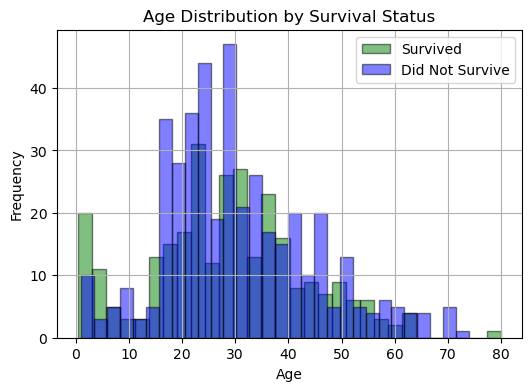

In [5]:
plt.figure(figsize=(6, 4))

plt.hist(train_data[train_data['Survived'] == 1]['Age'], bins=30, alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(train_data[train_data['Survived'] == 0]['Age'], bins=30, alpha=0.5, label='Did Not Survive', color='blue', edgecolor='black')

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()


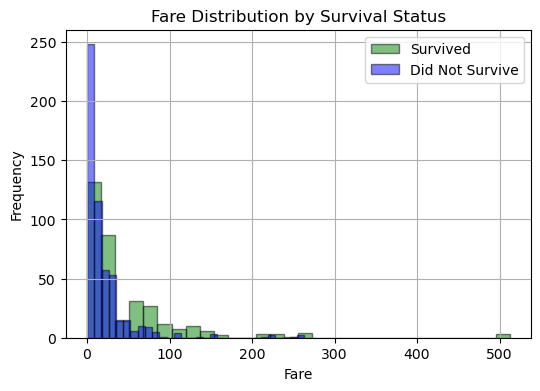

In [6]:
plt.figure(figsize=(6, 4))

plt.hist(train_data[train_data['Survived'] == 1]['Fare'], bins=30, alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(train_data[train_data['Survived'] == 0]['Fare'], bins=30, alpha=0.5, label='Did Not Survive', color='blue', edgecolor='black')

plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

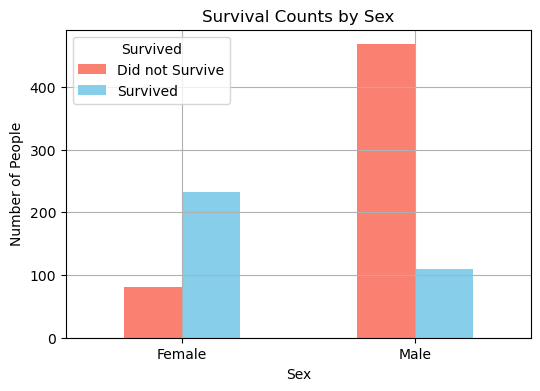

In [7]:
df = train_data.copy()
df['Sex_Label'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})

survival_counts = df.groupby(['Sex_Label', 'Survived']).size().unstack()
survival_counts.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])

plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

plt.show()



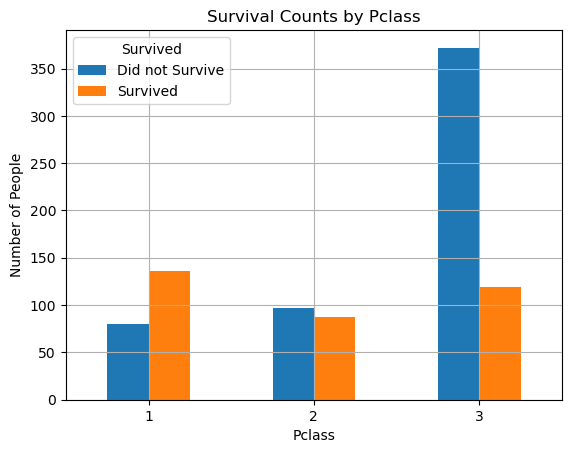

In [8]:
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
survival_counts.plot(kind='bar')

plt.title('Survival Counts by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

plt.show()

In [9]:
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
survival_counts

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

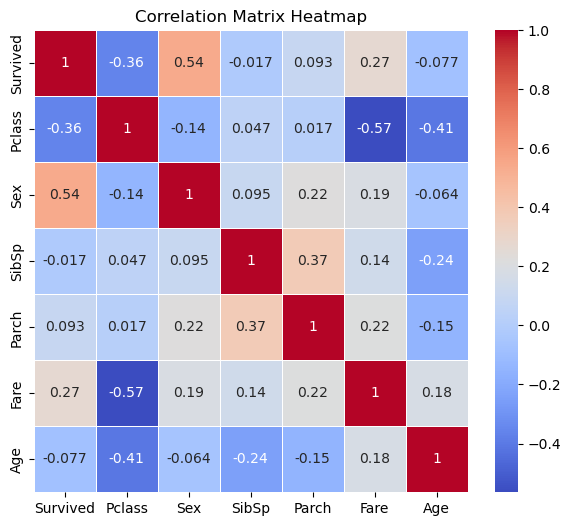

In [12]:
all_data = pd.concat([train_data, test_data])

all_data['Sex'] = all_data['Sex'].map({'male': 0, 'female': 1})
features = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]
age_present = all_data[all_data['Age'].notna()]
age_data = age_present[features]

corr = age_data.corr()

plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
median_ages = all_data.groupby("Pclass")['Age'].transform('median')
all_data['Age'] = all_data['Age'].fillna(median_ages)
median = all_data['Fare'].median() 
all_data['Fare'] = all_data['Fare'].fillna(median_ages) 

In [14]:
all_data = pd.get_dummies(all_data, columns=['Embarked'])

In [15]:
drop_cols = ["Ticket", "Cabin", "Name", "PassengerId"]

all_data.drop(columns=drop_cols, inplace=True)


In [16]:
data_train = all_data[:891]
data_test = all_data[891:]

In [17]:


X = data_train.drop(columns="Survived")
Y = data_train["Survived"]
data_test = data_test.drop(columns="Survived")

In [18]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,3,0,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,False,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,3,1,24.0,1,2,23.4500,False,False,True
889,1,0,26.0,0,0,30.0000,True,False,False


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

X_train_fold, X_val_fold,Y_train_fold, Y_val_fold   = train_test_split(X,Y)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_fold, Y_train_fold )
Y_val_pred = model.predict(X_val_fold)
Y_val_pred_proba = model.predict_proba(X_val_fold)
accuracy = accuracy_score(Y_val_fold, Y_val_pred)
loss = log_loss(Y_val_fold, Y_val_pred_proba)

print(accuracy)
print(loss)

0.8609865470852018
0.37560133693764924


In [21]:


predictions = model.predict(data_test)

output = pd.DataFrame({
    'PassengerId': test_data.PassengerId,
    'Survived': predictions.astype(int)
})




In [23]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
